# Libraries

In [1]:
library(dagitty)
library(tidyverse)

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Question

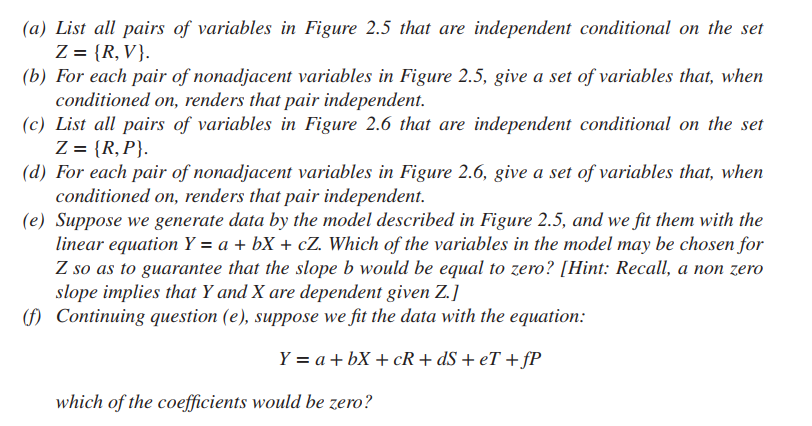

# Solution

## (a)

Figure 2.5:

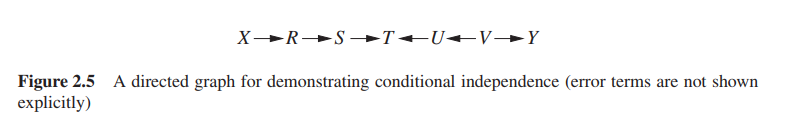

Plot coordinates for graph not supplied! Generating coordinates, see ?coordinates for how to set your own.



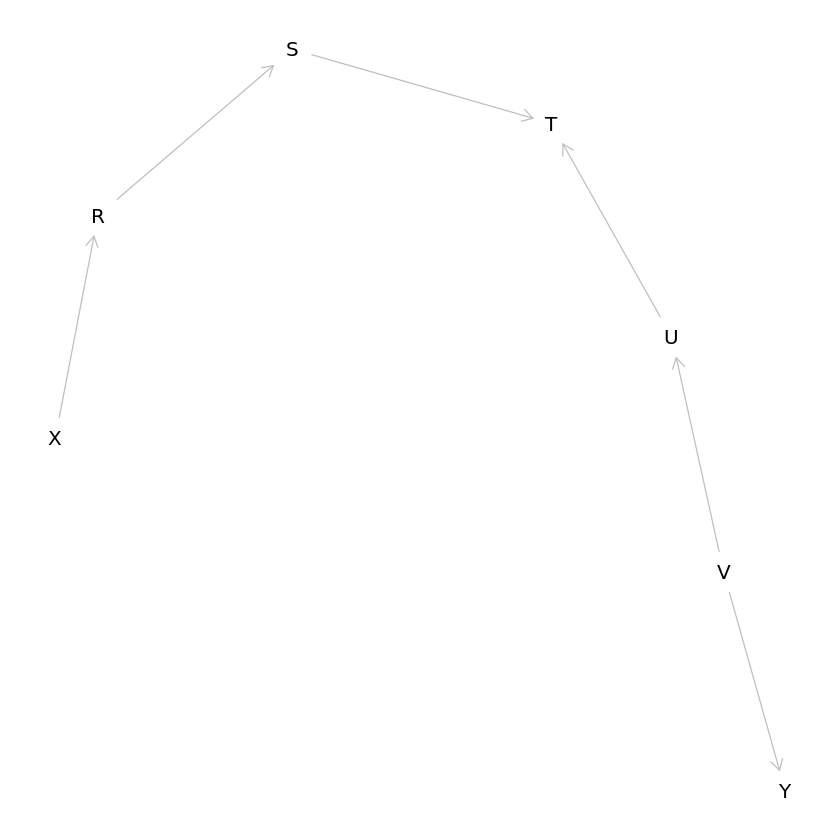

In [2]:
g2.5 <- dagitty('dag {
    X -> R -> S -> T <- U <-V -> Y
}')

plot(g2.5)

In [3]:
# set of all variables
v <- c("X", "R", "S", "T", "U", "V", "Y")
z <- c("R", "V")

# pairs of variables excluding Z
pairs <- setdiff(v, z) %>%
    combn(2)

In [4]:
print_results <- function(path, i){
    pair <- str_split(path, "->|<-") %>% 
        map(~str_interp("(${head(.x, 1)},${tail(.x, 1)})")) %>%
        first
    message(str_interp("${i}. ${pair} in \"${path}\" is independent"))
}

# matrices are out of scope for purrr
# see: https://github.com/tidyverse/purrr/issues/341
array_branch(pairs, 2) %>%
    # generate the paths between each pair given z
    # note: in this example, each pair only has 1 path
    map(~paths(g2.5, .x[1], .x[2], z)) %>%
    # d-separated path means definitely independent
    keep(~!.x$open) %>%
    map(~pluck(.x, "paths")) %>%
    iwalk(print_results)

1. (X , S) in "X -> R -> S" is independent

2. (X , T) in "X -> R -> S -> T" is independent

3. (X , U) in "X -> R -> S -> T <- U" is independent

4. (X , Y) in "X -> R -> S -> T <- U <- V -> Y" is independent

5. (S , U) in "S -> T <- U" is independent

6. (S , Y) in "S -> T <- U <- V -> Y" is independent

7. (T , Y) in "T <- U <- V -> Y" is independent

8. (U , Y) in "U <- V -> Y" is independent



* Pairs 1, 2, 3, 4 are independent because of the **Conditional Independence in Chains** rule
* Pair 5, 6 are independent because of the **Conditional Independence in Colliders** rule
* Pairs 7, 8 are independent becuase of the **Conditional Independence in Chains** rule

Alternative approach:

In [5]:
impliedConditionalIndependencies(g2.5) %>%
    # ignore relationships between pairs in z
    keep(~!(.x$X %in% z | .x$Y %in% z)) %>%
    # keep unconditional pairs or pairs conditioned with z
    keep(~if(length(.x$Z)) (.x$Z %in% z) else TRUE ) %>%
    iwalk(~message(str_interp("${.y}. ${.x}")))

5. S _||_ U

7. S _||_ X | R

8. S _||_ Y

10. T _||_ X | R

12. T _||_ Y | V

14. U _||_ X

15. U _||_ Y | V

17. X _||_ Y



## (b)

In [6]:
impliedConditionalIndependencies(g2.5) %>%
    iwalk(~message(str_interp("${.y}. ${.x}")))

1. R _||_ T | S

2. R _||_ U

3. R _||_ V

4. R _||_ Y

5. S _||_ U

6. S _||_ V

7. S _||_ X | R

8. S _||_ Y

9. T _||_ V | U

10. T _||_ X | R

11. T _||_ X | S

12. T _||_ Y | V

13. T _||_ Y | U

14. U _||_ X

15. U _||_ Y | V

16. V _||_ X

17. X _||_ Y



## (c)

Figure 2.6:

Plot coordinates for graph not supplied! Generating coordinates, see ?coordinates for how to set your own.



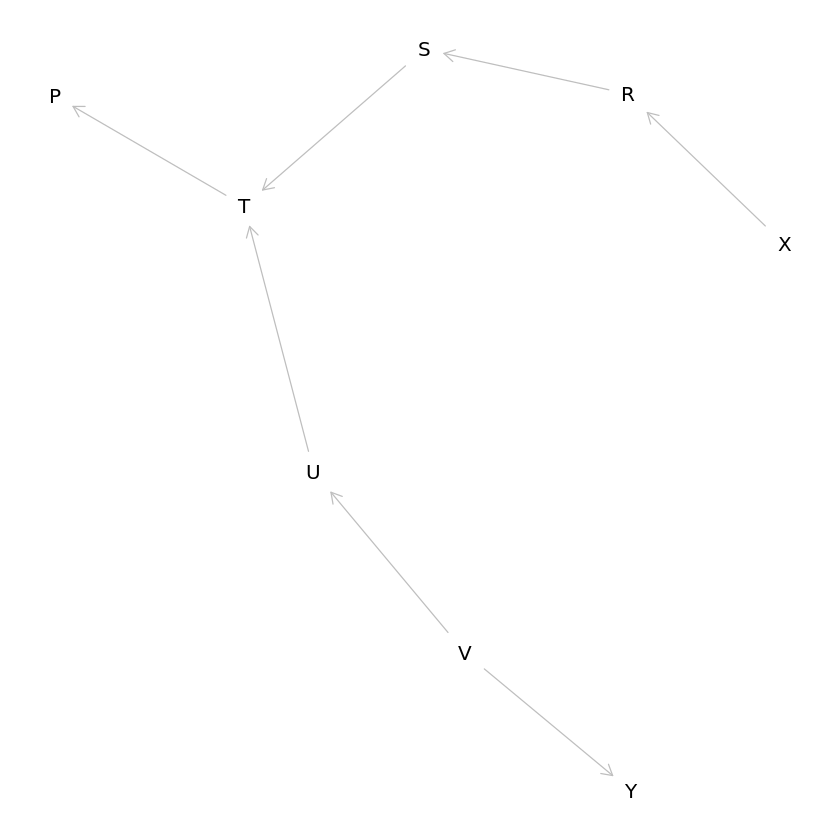

In [7]:
g2.6 <- dagitty('dag {
    X -> R -> S -> T <- U <-V -> Y
    T -> P
}')

plot(g2.6)

In [8]:
# set of all variables
v <- c("X", "R", "S", "T", "U", "V", "Y", "P")
z <- c("R", "P") # note that P is a descendant of a collider

# pairs of variables excluding Z
pairs <- setdiff(v, z) %>%
    combn(2)

array_branch(pairs, 2) %>%
    # if a pair is dseperated conditional on z, then the pair is
    # definitely independent
    keep(~dseparated(g2.6, .x[1], .x[2], z)) %>%
    iwalk(~message(str_interp("${.y}. (${.x[1]},${.x[2]}) is independent")))

1. (X,S) is independent

2. (X,T) is independent

3. (X,U) is independent

4. (X,V) is independent

5. (X,Y) is independent



## (d)

In [9]:
impliedConditionalIndependencies(g2.6) %>%
    iwalk(~message(str_interp("${.y}. ${.x}")))

1. P _||_ R | S

2. P _||_ R | T

3. P _||_ S | T

4. P _||_ U | T

5. P _||_ V | U

6. P _||_ V | T

7. P _||_ X | R

8. P _||_ X | S

9. P _||_ X | T

10. P _||_ Y | V

11. P _||_ Y | U

12. P _||_ Y | T

13. R _||_ T | S

14. R _||_ U

15. R _||_ V

16. R _||_ Y

17. S _||_ U

18. S _||_ V

19. S _||_ X | R

20. S _||_ Y

21. T _||_ V | U

22. T _||_ X | R

23. T _||_ X | S

24. T _||_ Y | V

25. T _||_ Y | U

26. U _||_ X

27. U _||_ Y | V

28. V _||_ X

29. X _||_ Y



## (e)

This means find a variable Z, such that X and Y become independent i.e. X and Y is independent conditional on Z:

In [10]:
potential_z <- setdiff(names(`g2.5`), c("X", "Y"))

In [11]:
potential_z %>%
    # if X and Y is dseparated by Z, then X and Y is independent
    # conditional on Z
    keep(~dseparated(g2.5, "X", "Y", .x)) %>%
    iwalk(~message(str_interp("${.y}. ${.x}")))

1. R

2. S

3. U

4. V



## (f)

Recall the model equation:

$$Y = a + b X + c R + d S + e T + f P $$

What are the variables that d-separates Y given {X, R, S, T, P} ?

In [12]:
dseparated(g2.6, "Y", list(), c("X", "R", "S", "T", "P"))

[1] "P" "R" "X"

Therefore, the $f, c, b$ will be 0.